<a href="https://colab.research.google.com/github/MerajSultanaKhalilAhmed/playstore-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis(Meraj_sultana_khalil_ahmed_shaikh)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

We are provided with the Google playstore data which consist of two data files.

playstore data
user reviews data Lets explore the data and analyse it

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/Play Store Data.csv')
df2=pd.read_csv('/content/User Reviews.csv')

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df1.shape

(10841, 13)

from this it concluded that there are 10841 rows and 13 are columns

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


from above we can see there are so many things to disscuss about .there are 13 columns which has enormous data .in this there are float and object dtype and the missing values which required cleaning and handling of NaN values

checking and replacing the NaN values:

In [ ]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

from above it concluded that the most null values are present in the Rating -1474 and the other are very less like Type-1,content rating-1,current ver-8,android ver-3



In [ ]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())
df1['Rating'] = df1['Rating'].astype(float)
df1.drop_duplicates(subset=['App'], inplace=True)
# drp rows that has NaN values on selected columns
df1=df1.dropna(subset=['Rating','Reviews'])
df1=df1.dropna(subset=['Content Rating','Size'])
df1=df1.dropna(subset=['Current Ver'])
df1=df1.dropna(subset=['Android Ver'])
df1['Type'].fillna('paid',inplace=True)

In [ ]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

here we have to convert this data type object to float .if we convert this it becomes easy to analysing the data.



In [ ]:
df1['Rating'] = pd.to_numeric(df1['Rating'])
df1['Rating'].dtype

dtype('float64')

CONVERTING REVIEWS,INSTALLS,PRICE & SIZE COLUMNS TO NUMERIC VALUES

In [ ]:
# Remove '+' and ',' from 'Installs' to make it numeric
df1['Installs']=df1['Installs'].apply(lambda X: str(X).replace('+','') if '+' in str(X) else str(X))
df1['Installs']=df1['Installs'].apply(lambda X: str(X).replace(',','') if ',' in str(X) else str(X))
df1['Installs']=df1['Installs'].apply(lambda X: float(X))
# Convert 'Size' column into Mbs to kbs
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
# Remove '$' from 'Price' columns to make it numeric
df1['Price'] = df1['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
# Convert the column types to numeric types
df1['Installs'] = df1['Installs'].apply(lambda x: float(x))
df1['Price'] = df1['Price'].apply(lambda x: float(x))
df1['Size'] = df1['Size'].apply(lambda x: float(x))
df1['Reviews'] = df1['Reviews'].apply(lambda x: int(x))

**Exploratory Data Analysis**

In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,20.413946,7.785404e+06,1.100079
std,0.496528,1.832255e+06,21.833132,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


lets discuss on the user reviews csv

In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df2.shape

(64295, 5)

there are 64295 rows and 5 columns

In [ ]:
def df2info():
  data_=pd.DataFrame(index=df2.columns)
  data_['Data_type']=df2.dtypes
  data_['null_counts']=df2.isnull().sum()
  data_['unique_count']=df2.nunique()
  return data_

In [ ]:
df2info()

,Data_type,null_counts,unique_count
App,object,0,1074
Translated_Review,object,26868,27994
Sentiment,object,26863,3
Sentiment_Polarity,float64,26863,5410
Sentiment_Subjectivity,float64,26863,4474


from above information it shows that: App : Contains the name of the app with a short description. Translated_Review: It contains the English translation of the review dropped by the user of the app. Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’. Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’. Sentiment_Subjectivity: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

**`filling the null valus`**

In [ ]:
df2['Translated_Review'].fillna('IDEA IS NOT WORKING',inplace=True)
df2['Sentiment'].fillna('ANGRY',inplace=True)
df2['Sentiment_Polarity'].fillna('4',inplace=True)
df2['Sentiment_Subjectivity'].fillna('-0.004',inplace=True)


In [ ]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

now i am concating the both play store data and the user reviews and also renaming the apps which present in both data ,becouse if i rename this it is easy to analys so lets see what happend after concating this



In [ ]:
df1.rename(columns={'App':'App1'},inplace=True)

In [ ]:
df2.rename(columns={'App':'App2'},inplace=True)

In [ ]:
playstore=pd.concat([df1,df2],axis=1)

In [ ]:
playstore.head()

,App1,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App2,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,IDEA IS NOT WORKING,ANGRY,4,-0.004
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.0,0.3


In [ ]:
playstore.tail()

,App1,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App2,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houzz Interior Design Ideas,IDEA IS NOT WORKING,ANGRY,4,-0.004
64291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houzz Interior Design Ideas,IDEA IS NOT WORKING,ANGRY,4,-0.004
64292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houzz Interior Design Ideas,IDEA IS NOT WORKING,ANGRY,4,-0.004
64293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houzz Interior Design Ideas,IDEA IS NOT WORKING,ANGRY,4,-0.004
64294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houzz Interior Design Ideas,IDEA IS NOT WORKING,ANGRY,4,-0.004


lets see how much missing values are there

In [ ]:
missing_values=playstore.isna().mean()
missing_values[:20]

App1                      0.849926
Category                  0.849926
Rating                    0.849926
Reviews                   0.849926
Size                      0.869010
Installs                  0.849926
Type                      0.849926
Price                     0.849926
Content Rating            0.849926
Genres                    0.849926
Last Updated              0.849926
Current Ver               0.849926
Android Ver               0.849926
App2                      0.000000
Translated_Review         0.000000
Sentiment                 0.000000
Sentiment_Polarity        0.000000
Sentiment_Subjectivity    0.000000
dtype: float64

DELETING THE ROWS CONTAINING NaN VALUES

In [ ]:
playstore=playstore.dropna(subset=['App1','Category','Rating','Reviews','Installs','Price','Price','Content Rating','Genres','Current Ver','Android Ver'])
playstore=playstore.dropna().reset_index(drop=True)

In [ ]:
def playstoreinfo():
  data_=pd.DataFrame(index=playstore.columns)
  data_['Data_type']=playstore.dtypes
  data_['null_counts']=playstore.isnull().sum()
  data_['unique_count']=playstore.nunique()
  return data_

In [ ]:
playstoreinfo()

,Data_type,null_counts,unique_count
App1,object,0,8422
Category,object,0,33
Rating,float64,0,39
Reviews,float64,0,4302
Size,float64,0,455
Installs,float64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,115


In [ ]:
#the shape of the updated playstore
playstore.shape

(8422, 18)

*so* after the updated there are 8422 rows
columns are 18

# `DATA VISUALISATION ON PLAYSTORE`


corelation map of corrosponding dataset

In [ ]:
playstore.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061308,0.045525,0.040479,-0.018734
Reviews,0.061308,1.000000,0.179276,0.597281,-0.008656
Size,0.045525,0.179276,1.000000,0.134215,-0.022492
Installs,0.040479,0.597281,0.134215,1.000000,-0.010156
Price,-0.018734,-0.008656,-0.022492,-0.010156,1.000000


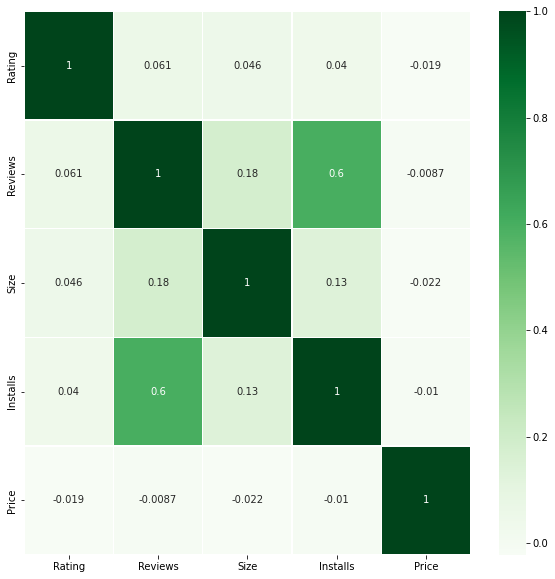

In [ ]:
x,y = plt.subplots(figsize=(10, 10))
sns.heatmap(playstore.corr(),annot=True,linewidths=.3,cmap="Greens")
plt.show()

Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot=True, will get values by which features are correlated to each other in grid-cells.

[ ]


In [ ]:
playstore.Installs.value_counts()


1.000000e+06    1175
1.000000e+05    1005
1.000000e+04     988
1.000000e+03     852
1.000000e+02     692
1.000000e+07     646
5.000000e+05     461
5.000000e+03     451
5.000000e+06     450
5.000000e+04     435
1.000000e+01     374
5.000000e+02     320
5.000000e+01     200
5.000000e+07     111
1.000000e+08      96
5.000000e+00      78
1.000000e+00      64
0.000000e+00      14
5.000000e+08       8
1.000000e+09       2
Name: Installs, dtype: int64

In [ ]:
#average price of each genera
x=pd.pivot_table(index='Category',columns='Installs',values='Price',data=playstore,aggfunc=np.mean)

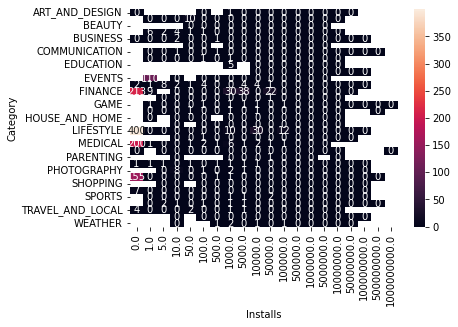

In [ ]:
sns.heatmap(x,annot=True,fmt='0.0f')

here is the category installed price .dark color represent the most installed category which has zero prices .most of the majority in this is zero

In [ ]:
grp=playstore.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.628411e+06
AUTO_AND_VEHICLES      5.836028e+05
BEAUTY                 2.914245e+05
BOOKS_AND_REFERENCE    5.956532e+05
BUSINESS               1.027736e+06
COMICS                 3.567582e+05
COMMUNICATION          7.512161e+06
DATING                 5.321139e+05
EDUCATION              1.767438e+06
ENTERTAINMENT          9.968125e+06
EVENTS                 1.872307e+05
FAMILY                 2.062050e+06
FINANCE                8.181387e+05
FOOD_AND_DRINK         1.552145e+06
GAME                   1.321015e+07
HEALTH_AND_FITNESS     3.260612e+06
HOUSE_AND_HOME         8.324590e+05
LIBRARIES_AND_DEMO     6.361989e+05
LIFESTYLE              1.211380e+06
MAPS_AND_NAVIGATION    1.626448e+06
MEDICAL                8.584135e+04
NEWS_AND_MAGAZINES     5.925401e+06
PARENTING              4.439076e+05
PERSONALIZATION        2.564954e+06
PHOTOGRAPHY            6.729269e+06
PRODUCTIVITY           4.454683e+06
SHOPPING               4.230648e+06
SOCIAL             

category vs installed

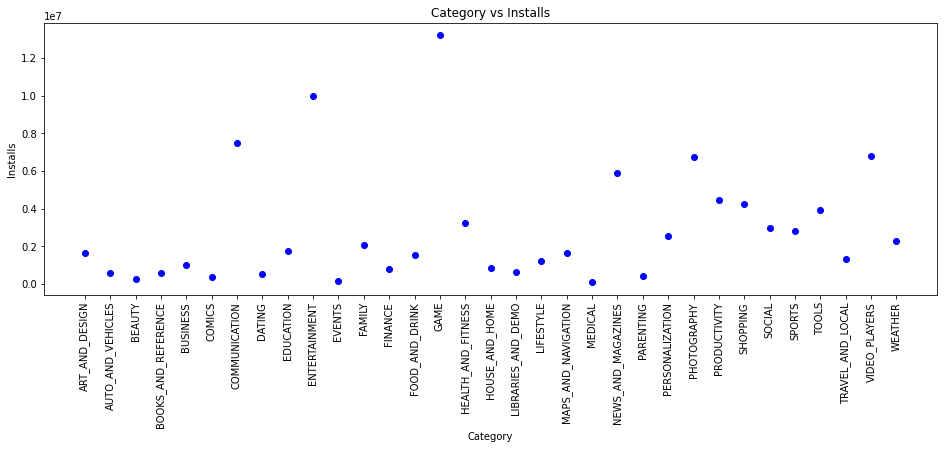

In [ ]:
#category vs installed
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

INFERENCE:Here highest installed category is game and second most installed is entertainment

Category vs pricing

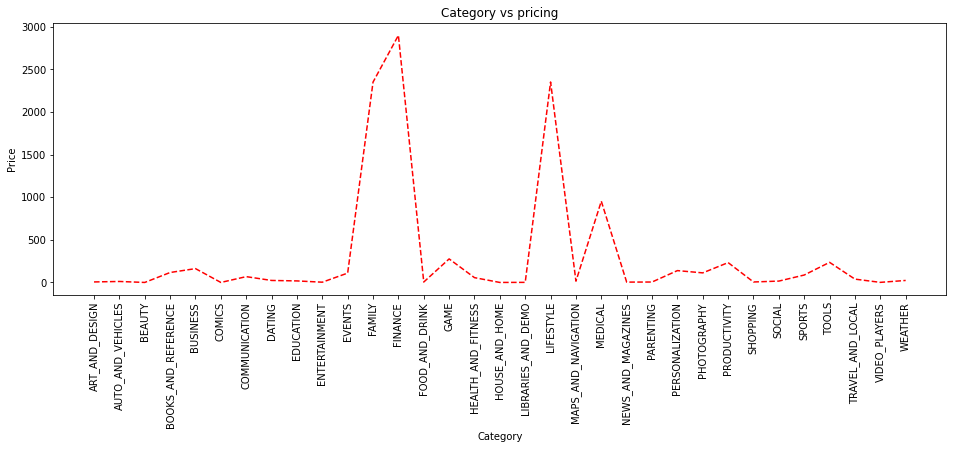

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.title('Category vs pricing')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

INFERENCE:family,finance are the highest category pricing app

Category vs Reviews

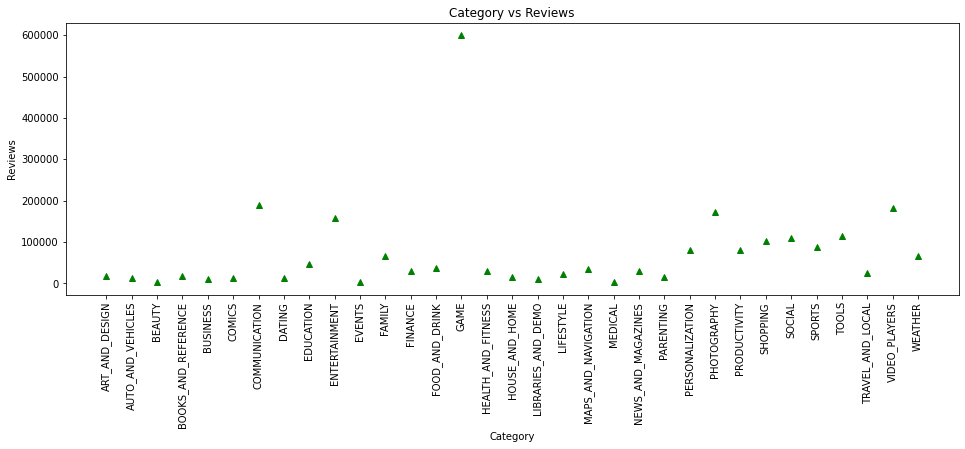

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'g^',color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

INFERENCE:highest reveiew category is on game

total reviews on each app

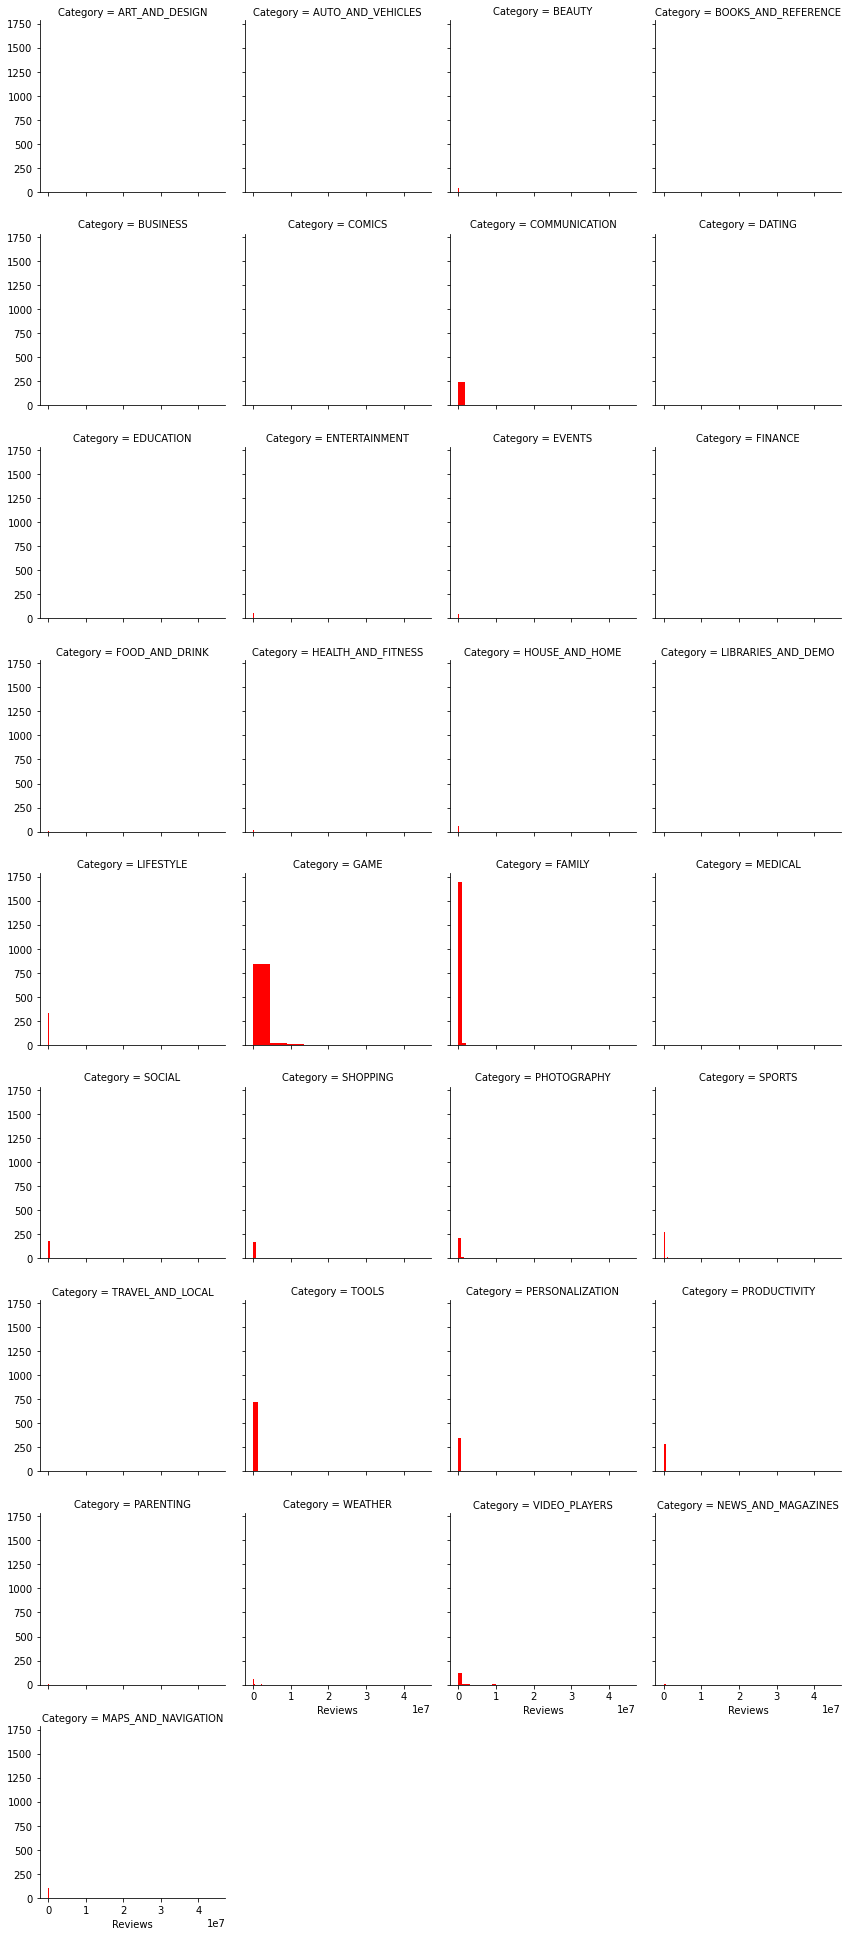

In [ ]:
A = sns.FacetGrid(playstore, col='Category', palette="Set1",  col_wrap=4, height=3)
A = (A.map(plt.hist, "Reviews", color="r"))

graph is the correlation between category and reviews,Family and game category had a lot of reviews.Some app had no review at all, like art design,auto and vehical,buissness,parenting,news_and_magazines,travel_and_local,medical,health and fitness,libararies_and demo, finance,comics and more. it is interesting Event app has a high rating but rare review on it.

value of Install on each category.

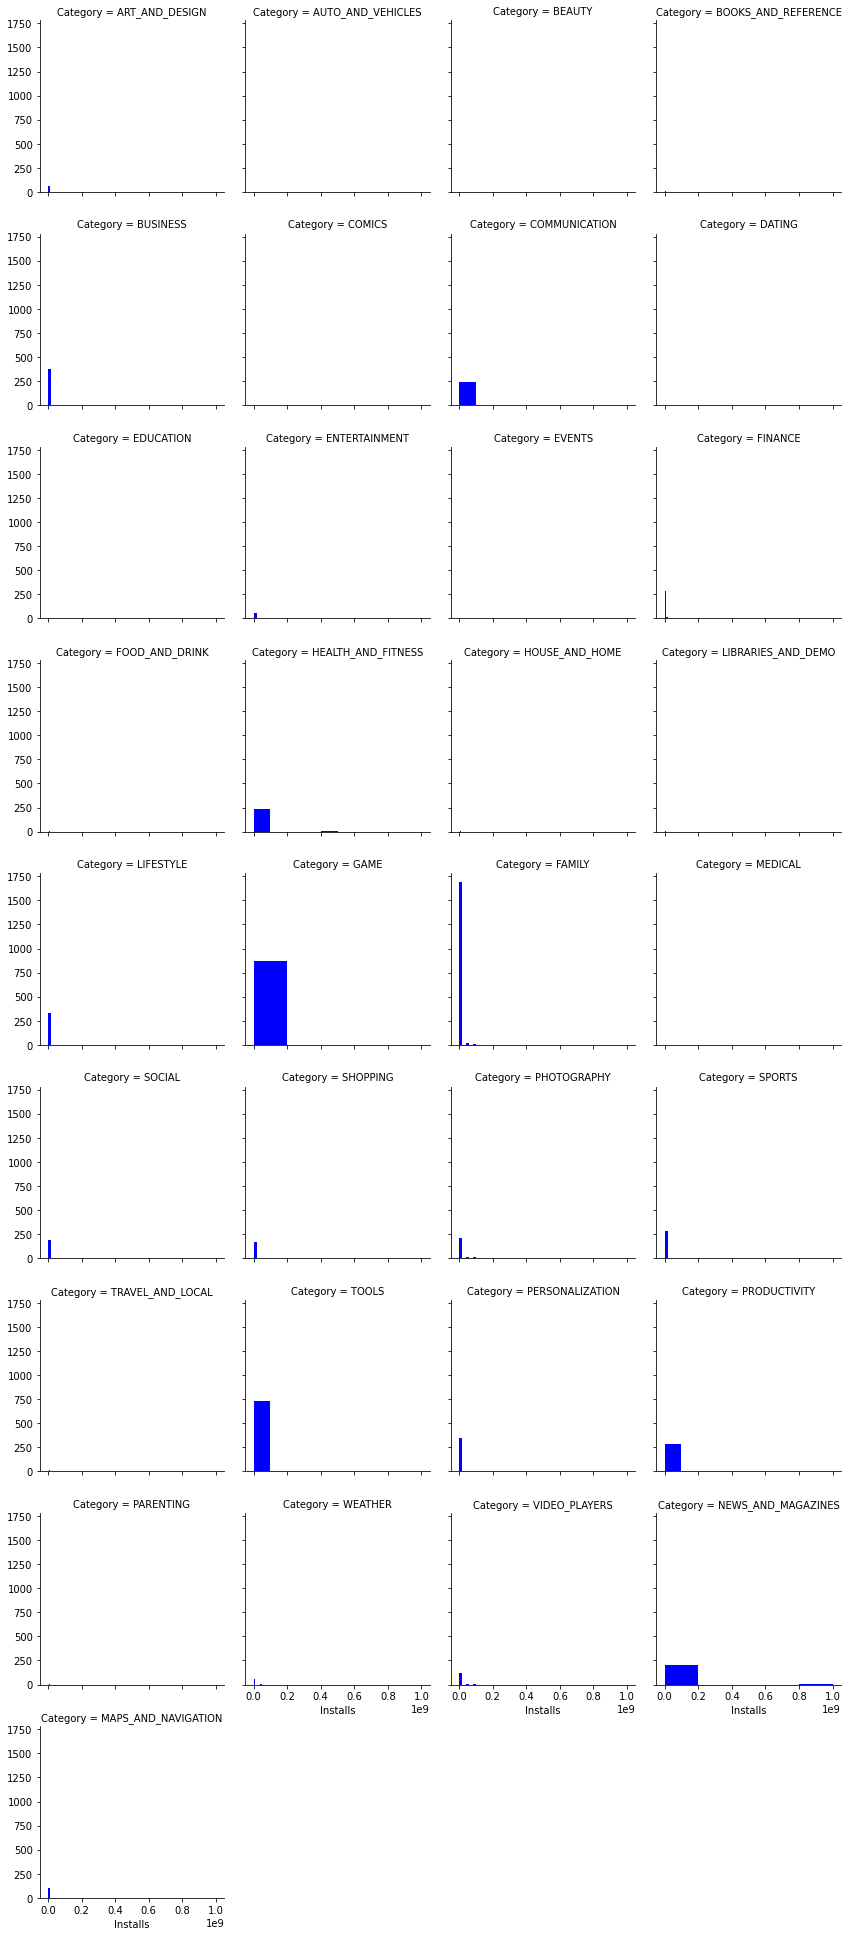

In [ ]:
y = sns.FacetGrid(playstore, col='Category', palette="Set1",  col_wrap=4, height=3)
y = (y.map(plt.hist, "Installs", bins=5, color='b'))

in the above graph highest installed category is Game ,Family .some apps have no installed category like parenting,medical etc.

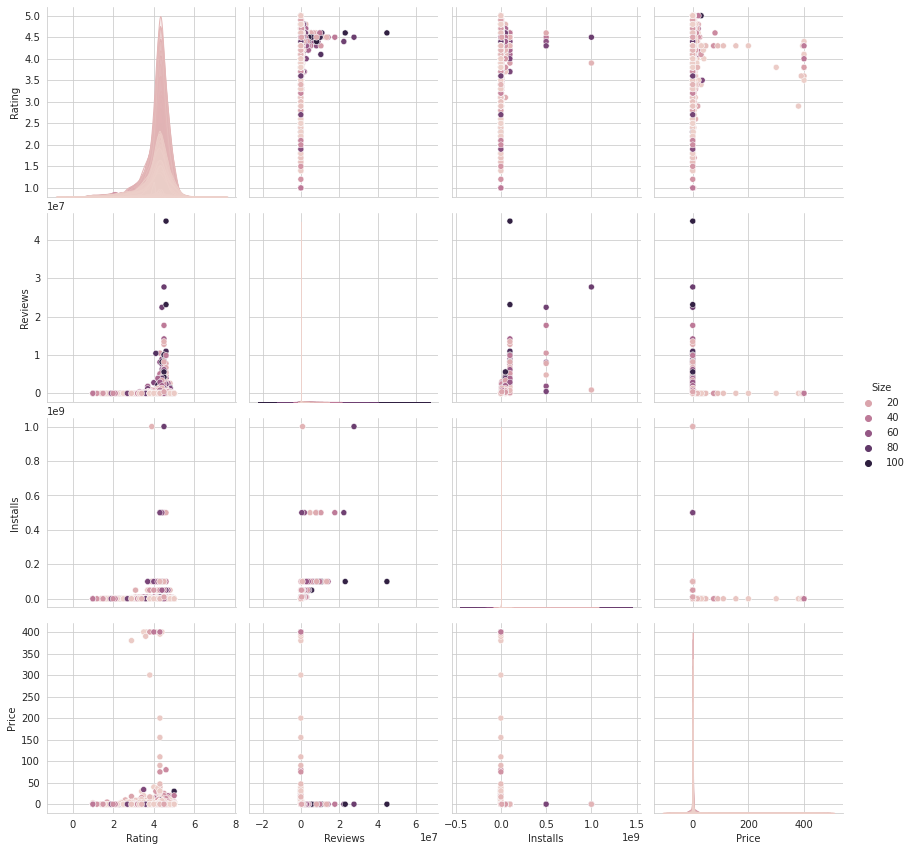

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(playstore,hue="Size",size=3);
plt.show()

Distribution of Rating

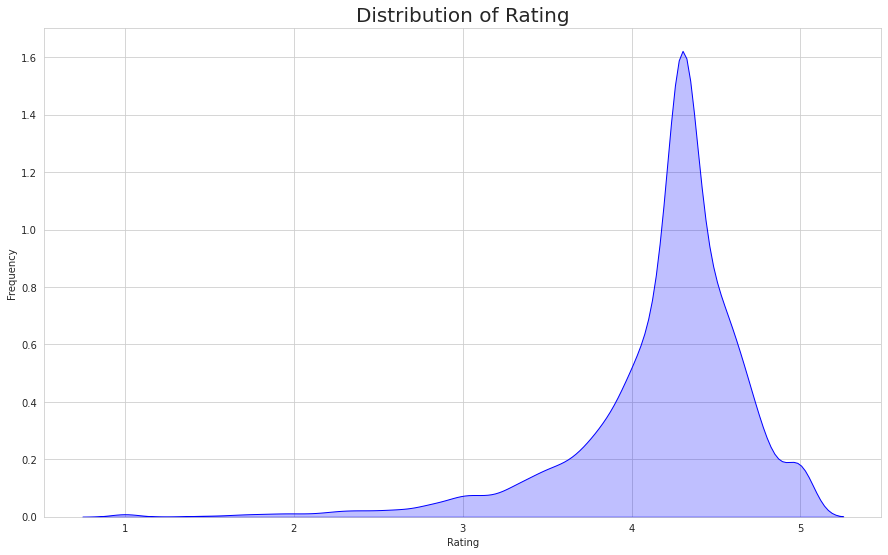

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(playstore.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

Distribution of size using distplot

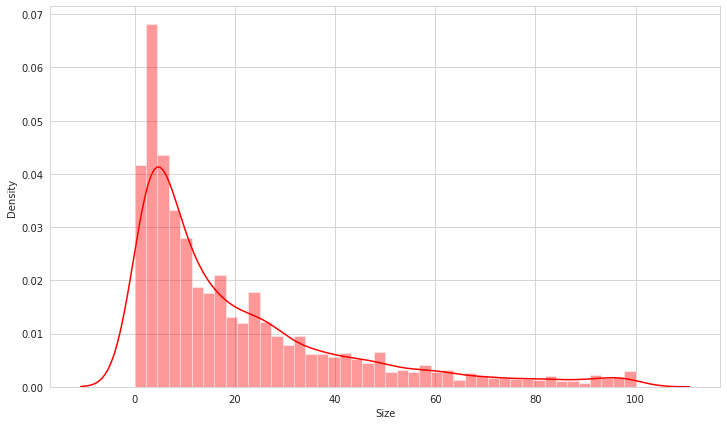

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.distplot(playstore[playstore['Size'] != 'Varies with device']['Size'], color='Red')

As we can see that the vast majority in this are varies with device.

is there a correlation between rating,reviews,size with the price of apps

[ ]


In [ ]:
playstore.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061308,0.045525,0.040479,-0.018734
Reviews,0.061308,1.000000,0.179276,0.597281,-0.008656
Size,0.045525,0.179276,1.000000,0.134215,-0.022492
Installs,0.040479,0.597281,0.134215,1.000000,-0.010156
Price,-0.018734,-0.008656,-0.022492,-0.010156,1.000000


In [ ]:
playstore.corr()['Price']

Rating     -0.018734
Reviews    -0.008656
Size       -0.022492
Installs   -0.010156
Price       1.000000
Name: Price, dtype: float64

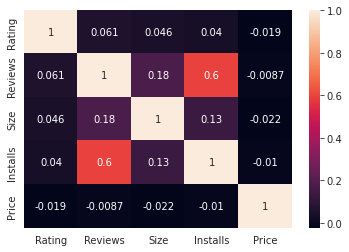

In [ ]:
sns.heatmap(playstore.corr(),annot=True)

we found that there is no correlation between app features like size,ratin , number of installs and price

create a pair plot for reviews,size,price and content rating

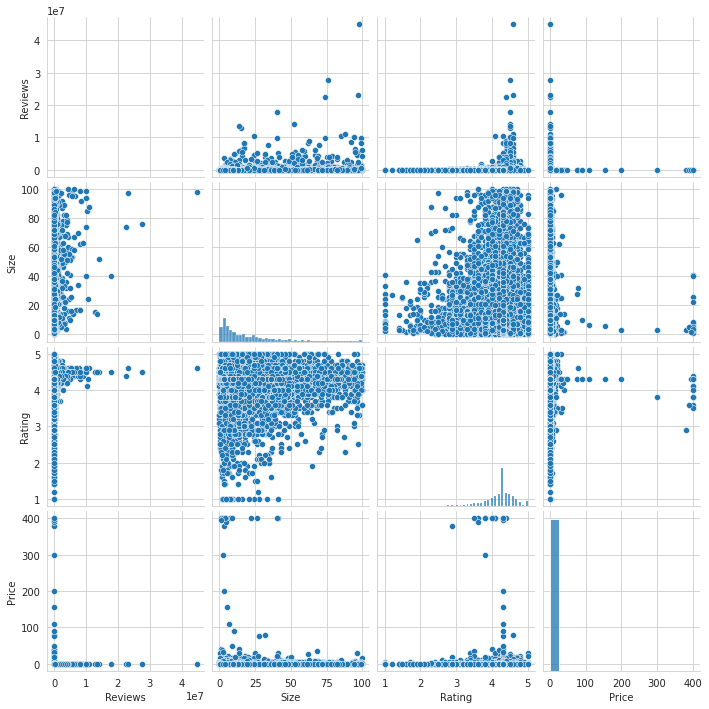

In [ ]:
sns.pairplot(playstore[["Reviews","Size","Rating","Price"]])
plt.show()

CONTENT RATING

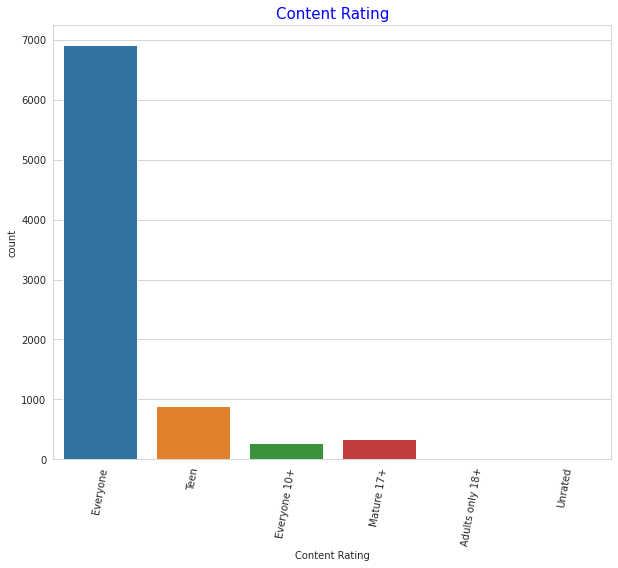

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=playstore,x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color='blue',fontsize=15)
plt.show()

INFERENCE:HIGHEST CONTENT RATING IS FOR EVERYONEAND LOWEST IS ADULTS ONLY 18+ AND UNRATED

TOP 5 INSTALLS APP1

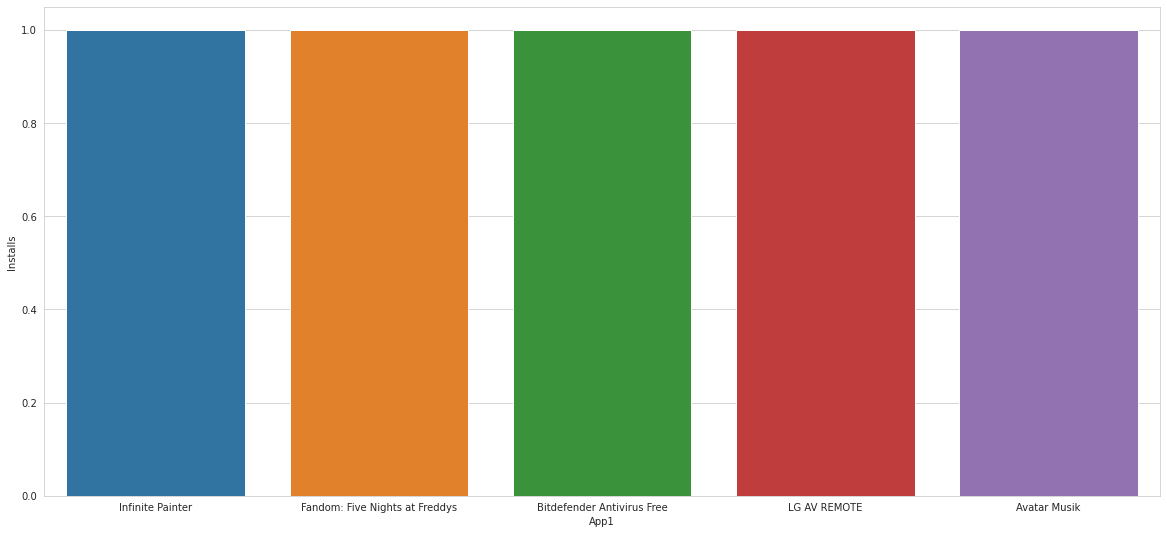

In [ ]:
plt.figure(figsize=(20,9))
App1= playstore[playstore['Installs'] == 1000000]['App1'].value_counts()[:5]
sns.barplot(y=App1,x=App1.index,orient='v')
plt.xlabel('App1')
plt.ylabel('Installs')
plt.show()

iNFERRENCE:ABOVE GRAPH SHOWS THE TOP FIVE APP1

TOP 10 INSTALLS APP2

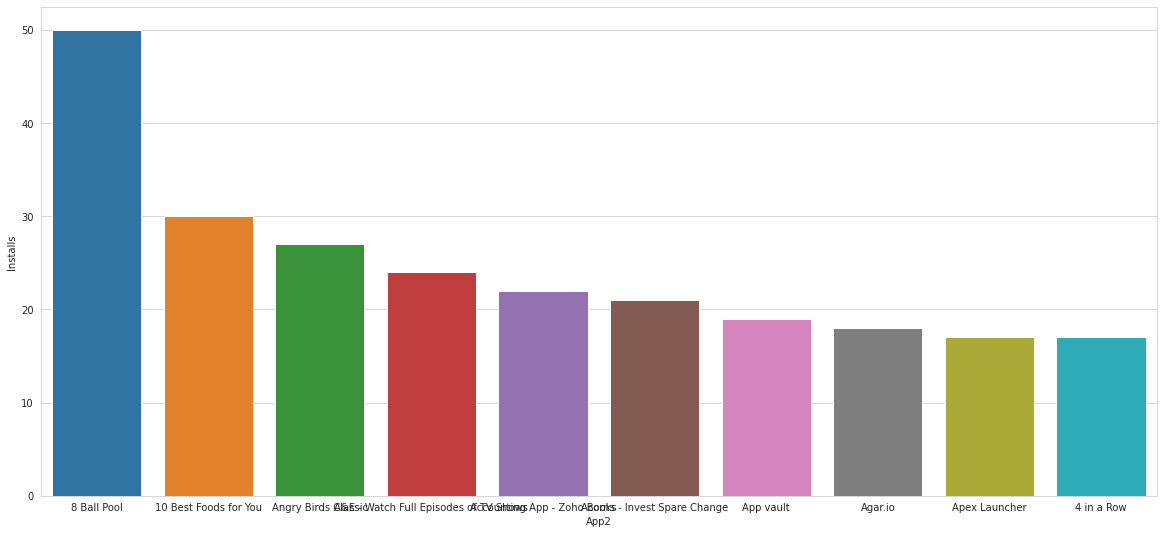

In [ ]:
plt.figure(figsize=(20,9))
App1= playstore[playstore['Installs'] == 1000000]['App2'].value_counts()[:10]
sns.barplot(y=App1,x=App1.index,orient='v')
plt.xlabel('App2')
plt.ylabel('Installs')
plt.show()


INFERENCE:8 BALL POOL IS TOP APP2 INSTALLS APP OF THE PLAYSTORE

TOP 10 CATAGORIES

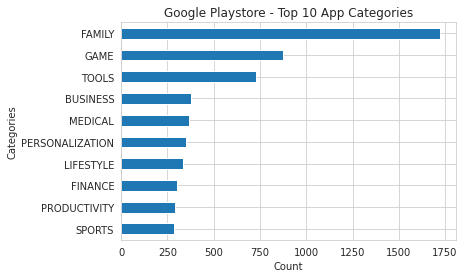

In [ ]:
playstore["Category"].value_counts().nlargest(10).sort_values(ascending=True).plot.barh()
plt.ylabel("Categories")
plt.xlabel("Count")
plt.title("Google Playstore - Top 10 App Categories")
plt.show()

HIGHEST CATEGORY REVIEW

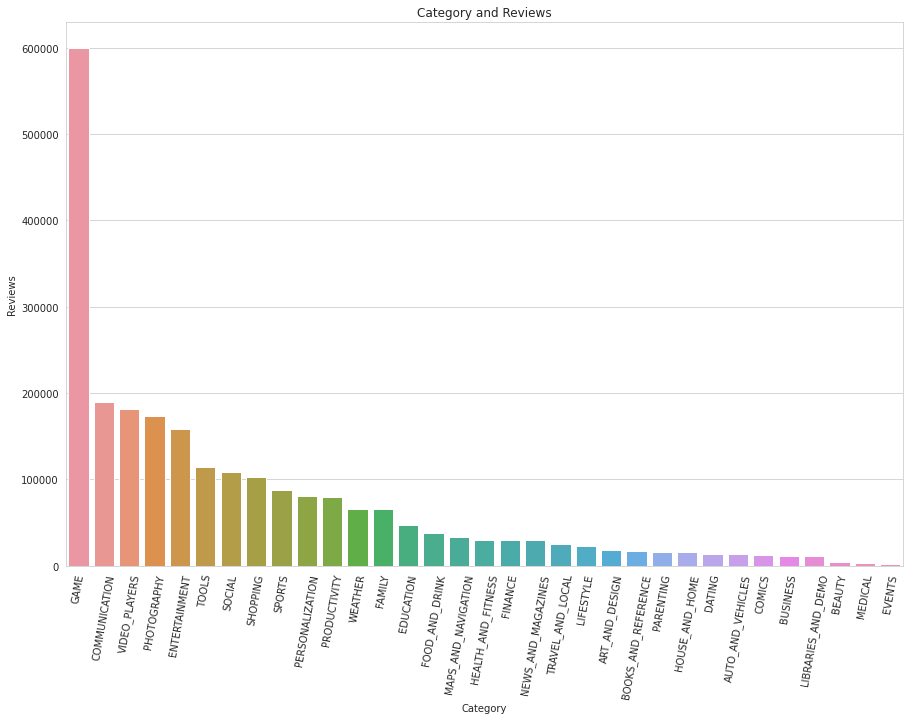

In [ ]:
category_list = list(playstore['Category'].unique())
category_review = []
for i in category_list:
    x = playstore[playstore['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'Category': category_list,'Review':category_review})
new_index = (data_category_reviews['Review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['Category'], y=sorted_data['Review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

INFERENCE:here highest category reviews is game becouse nowdays children and adults ,everyone wants to play more games and like to comment on it

DISTRIBUTION OF RATING

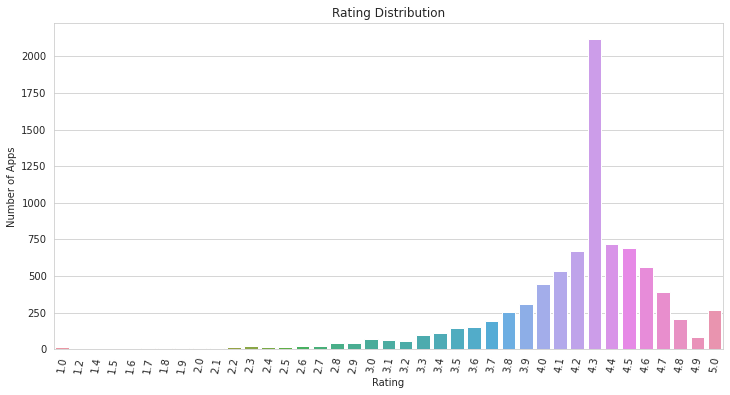

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=playstore)
plt.title('Rating Distribution')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

INFERENCE:highest distribution rating on the 4.3

PERCENTAGE OF SENTIMENTS



In [ ]:
playstore['Sentiment'].value_counts()

Positive    3415
ANGRY       2944
Negative    1274
Neutral      789
Name: Sentiment, dtype: int64

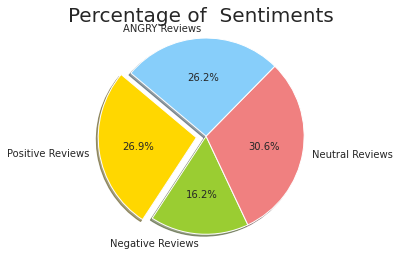

In [ ]:
counts = list(playstore['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews','ANGRY Reviews'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of  Sentiments', fontsize=20)
plt.axis('equal')
plt.show()

Positive reviews =26.9%

Negative reviews=16.2%

Neutral reviews=30.6%

Angry reviews=26.2%

* CONTENT RATING IN %*

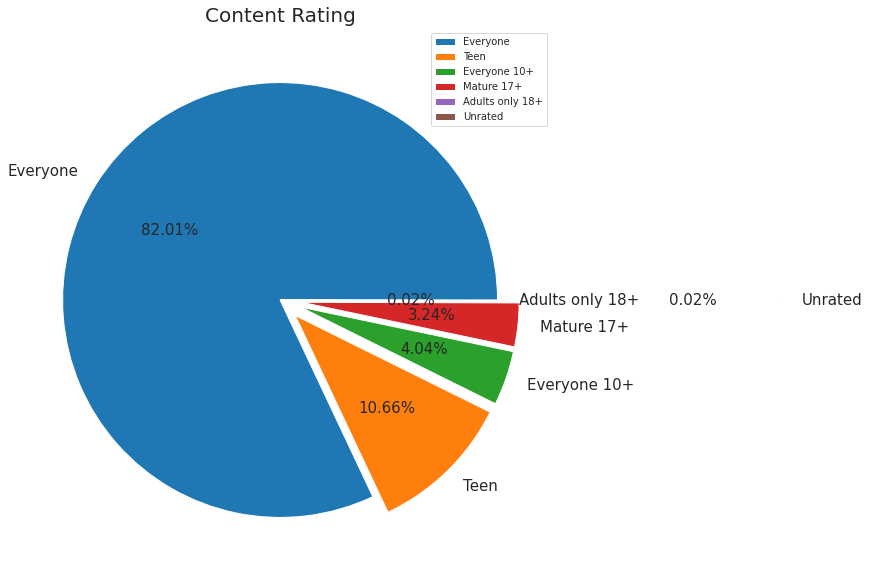

In [ ]:
#Content Rating
data = playstore['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
#colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels,autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

INFERENCE:from above it is concluded that most of the apps in playstore is used by EVERYONE

count of apps in each category

In [ ]:
#top category on google playstore
y = playstore['Category'].value_counts().index
x = playstore['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

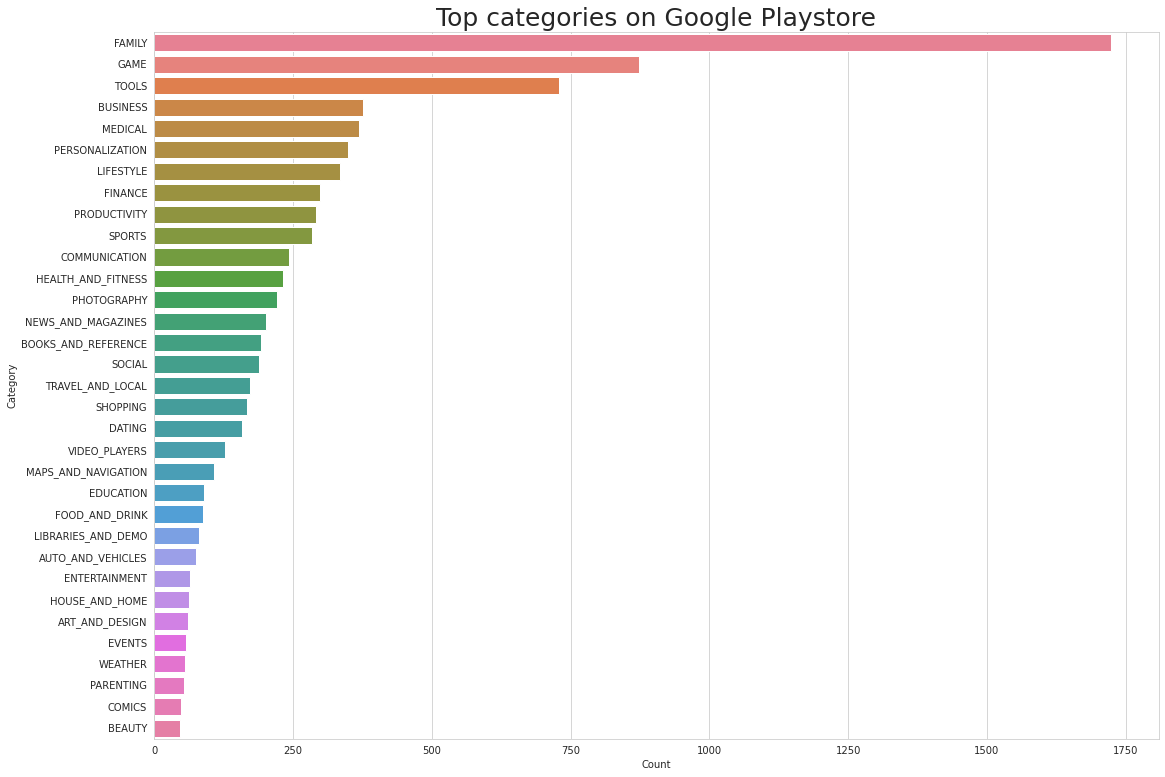

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

INFERENCE:family is the top counted category on the google playstore

Which are the Genres that are getting installed the most in top 20 Genres?



In [ ]:
top_genres = playstore.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = playstore.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)


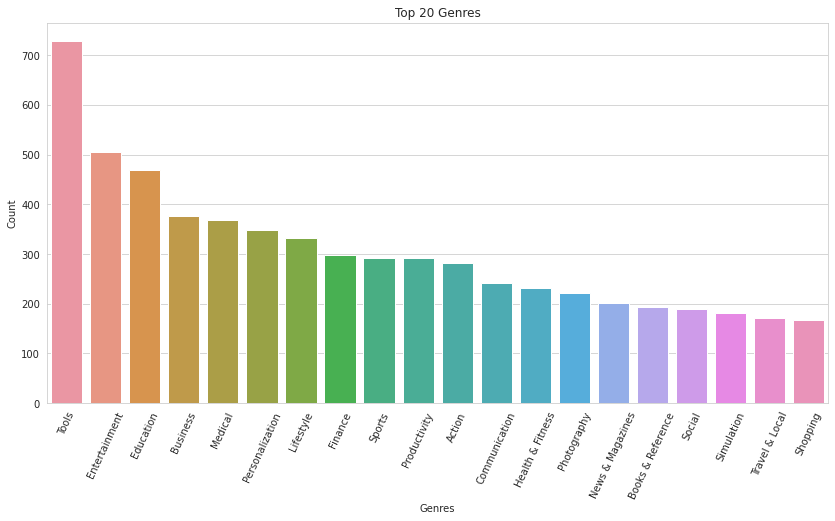

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

INFERENCE:THESE ARE THE TOP 20 GENRES COUNT

CATEGORY VS INSTALLED

In [ ]:
categories = playstore.groupby('Category')
category_installs_sum = categories[['Installs']].sum()
category_installs_sum = category_installs_sum.reset_index()  


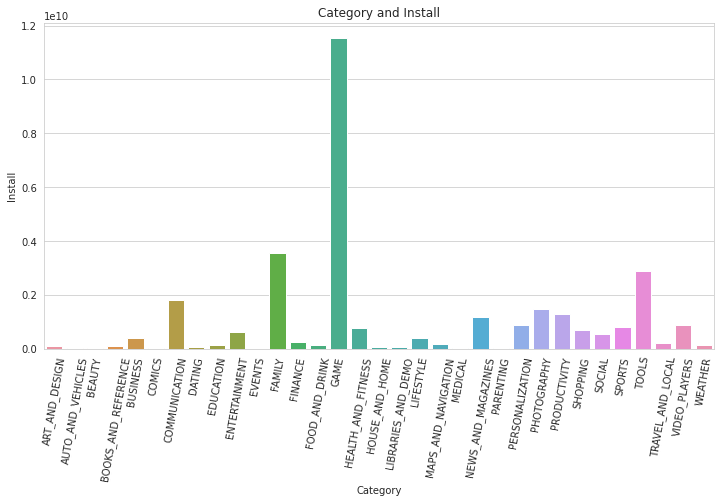

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Installs',data = category_installs_sum)
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

INFERENCE:-HERE IT IS CONCLUDED THAT GAME IS THE HIGHEST CATEGORY INSTALLED.

DISRIBUTION OF APPS

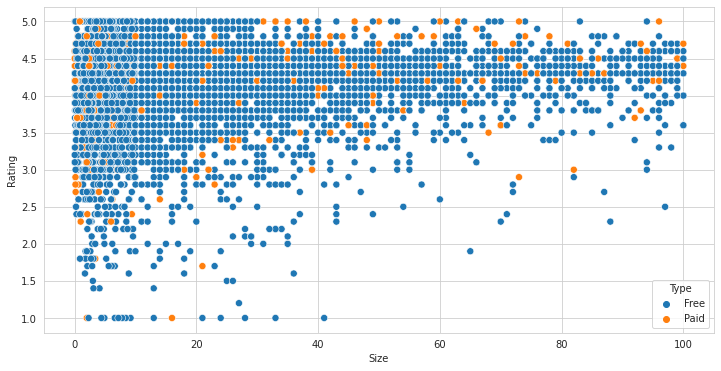

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(playstore['Size'],
               playstore['Rating'],
               hue=playstore['Type'],
               s=50)

From above plot it shows distribution of rating so here majority of free apps is higher as compared to paid apps

WHAT PROPORTION OF AAP ARE PAID OR FREE

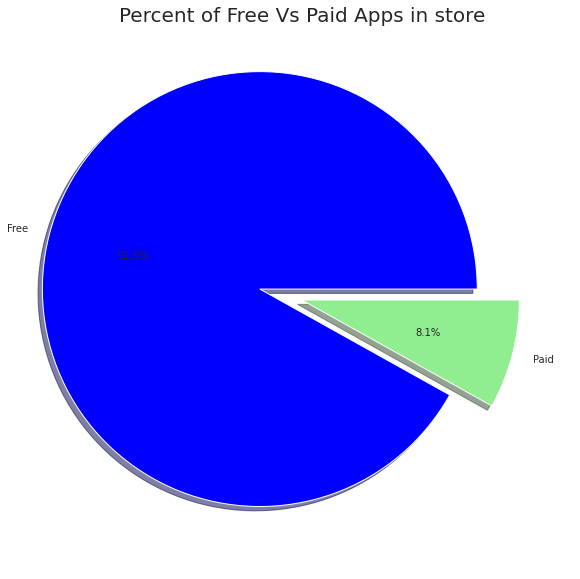

In [ ]:
#what proportion of aap are paid or free
plt.figure(figsize=(10,10))
labels = playstore['Type'].value_counts(sort = True).index
sizes = playstore['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

INFERENCE:91.9% of apps are free and 8.1 % are paid

TOP EARNING APP1

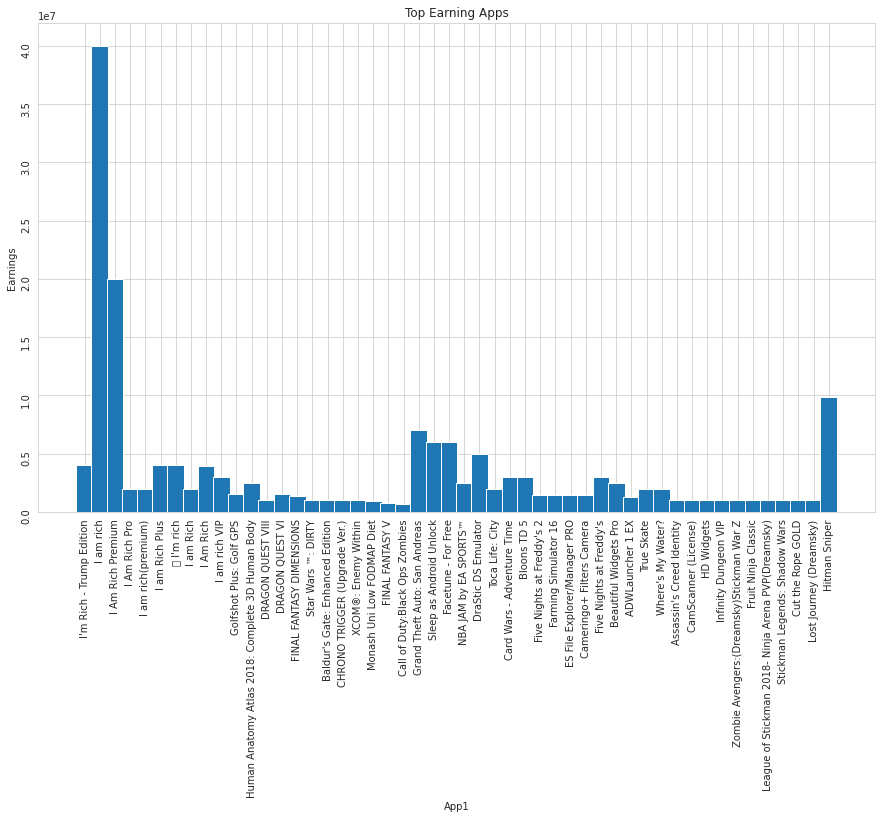

In [ ]:
#top earning aaps
earning_df = playstore[['App1', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App1, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("App1")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

INFERENCE:i'm rich is top earning app and the lowest is cut the rope gold

TOP EARNING APP2

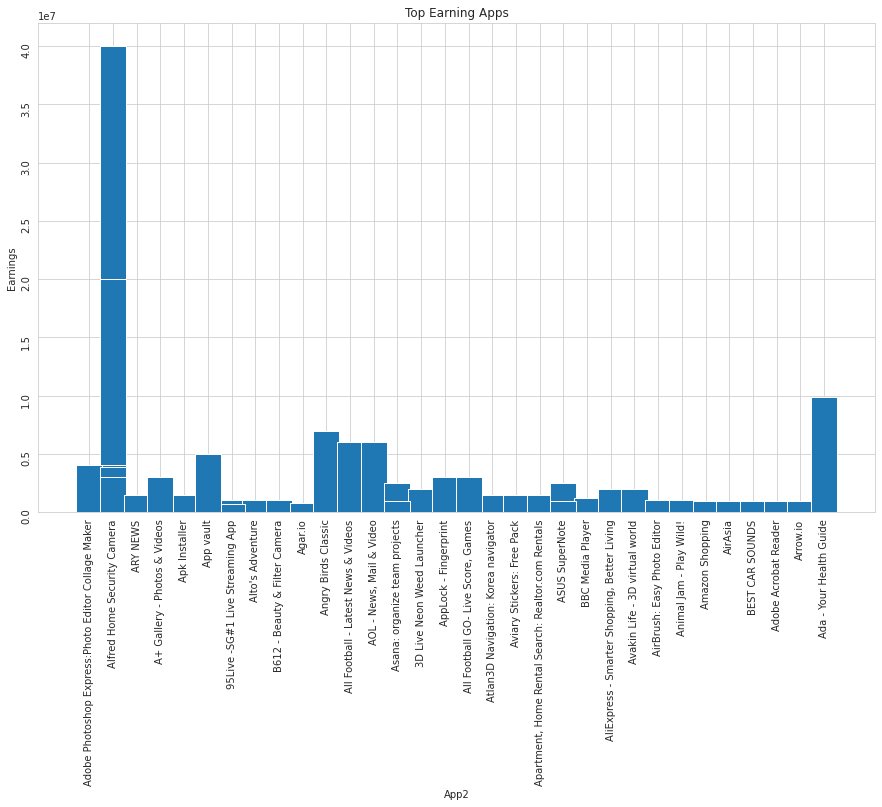

In [ ]:

#for the second app
earning_df = playstore[['App2', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App2, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("App2")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

INFERENCE:Alfred home security camera is most earning of app2

INFERENCE:1line-one line with one touch has the highest review but some of the rating group is constant

CURRENT UPDATE

In [ ]:
finding_previous = playstore["Last Updated"].value_counts().head(5)

In [ ]:
type(finding_previous)

pandas.core.series.Series

In [ ]:
finding_previous.sort_index(inplace=True)

In [ ]:
finding_previous

August 1, 2018    152
August 2, 2018    158
August 3, 2018    178
July 30, 2018     114
July 31, 2018     153
Name: Last Updated, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 0, 'Date')

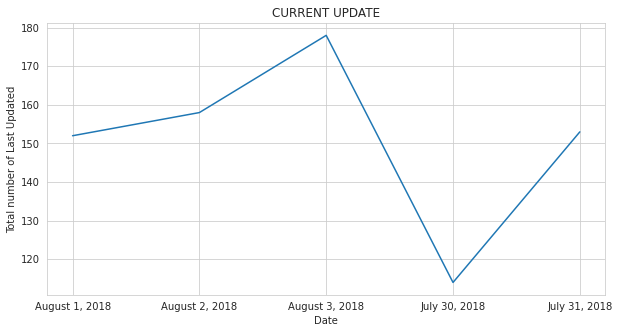

In [ ]:
# Create the plot object
plt.plot(finding_previous)

plt.title('CURRENT UPDATE')
plt.ylabel('Total number of Last Updated')
plt.xlabel('Date')

INFERENCE:current update is august 3,2018

In [ ]:
playstore['Last Updated'].head()

In [ ]:
playstore['Last Updated']=pd.to_datetime(playstore['Last Updated']).dt.month

In [ ]:
playstore['Updated Month']=pd.to_datetime(playstore['Last Updated']).dt.month

In [ ]:
playstore.groupby(['Updated Month'])['Rating'].mean()

In [ ]:
pd.pivot_table(data=playstore,index="Updated Month",columns="Content Rating",values="Installs",aggfunc=sum)

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Updated Month,,,,,,
1,1500000.0,2.150951e+10,2.859662e+09,941964878.0,6.088294e+09,50500.0


In [ ]:
inp1=pd.pivot_table(data=playstore,index="Updated Month",columns="Content Rating",values="Installs",aggfunc=sum)

how many updated month on the basis of content rating



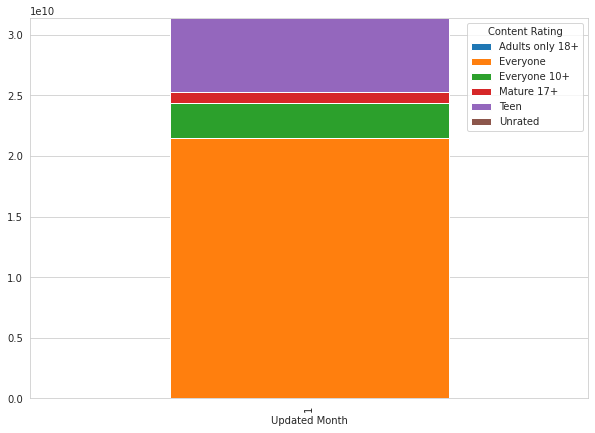

In [ ]:
inp1.plot(kind='bar',stacked=True,figsize=[10,7])
plt.show()

RATING ACCORDING TO GENRES

In [ ]:
top_genres = playstore.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = playstore.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')


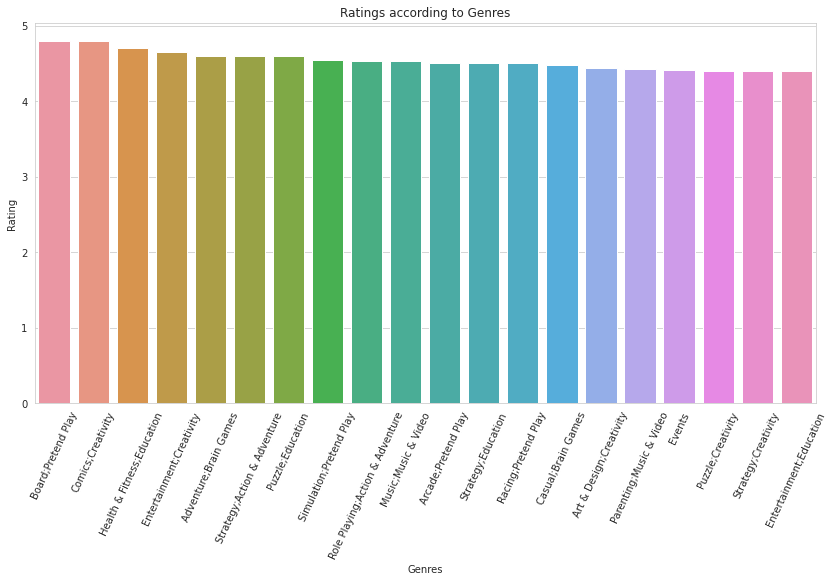

In [ ]:
#average rating
#highest and lowest genera
genres_ratings_df = playstore.groupby(['Genres'])[['Rating']].mean()
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

In [ ]:
positive_user=playstore[playstore['Sentiment']=='Positive']


Text(0.5, 0, 'Total number of positive reviews')

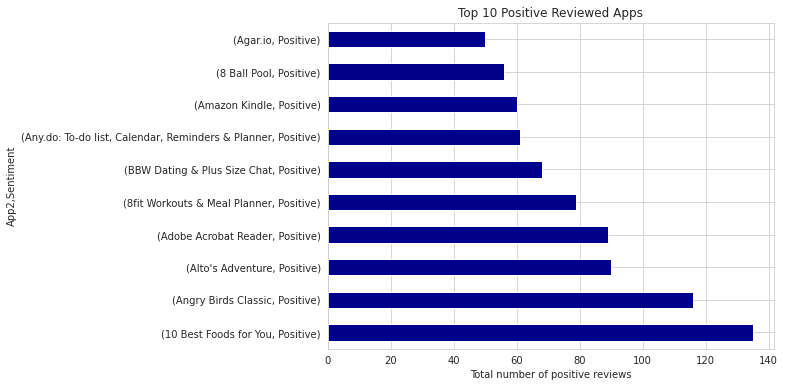

In [ ]:
positive_user.groupby('App2')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(8,6),color='Darkblue')
plt.title("Top 10 Positive Reviewed Apps")
plt.xlabel('Total number of positive reviews')


In [ ]:
negative_user=playstore[playstore['Sentiment']=='Negative']

Text(0.5, 0, 'Total number of Negative reviews')

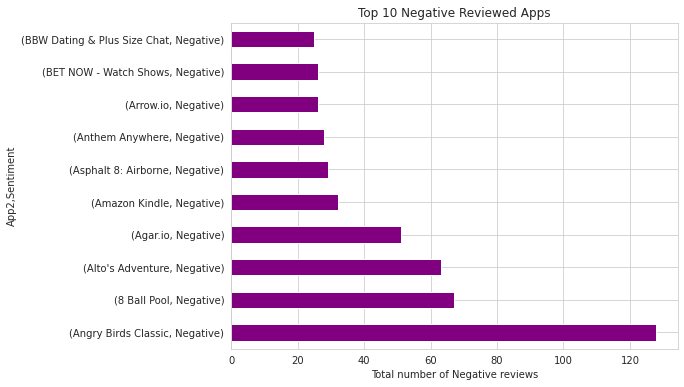

In [ ]:
negative_user.groupby('App2')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(8,6),color='Purple')
plt.title("Top 10 Negative Reviewed Apps")
plt.xlabel('Total number of Negative reviews')

Count of applications in each category differentiated by their type

[ ]


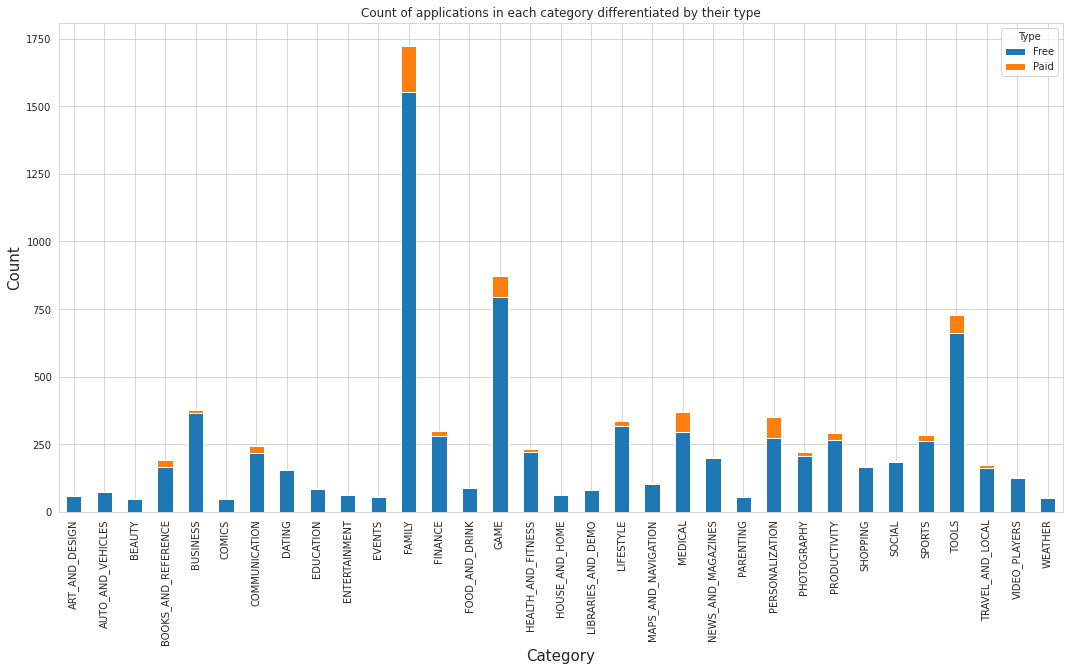

In [ ]:
#What are the count of applications in each category differentiated by their type?
app_count = playstore.groupby(['Category','Type'])[['App1']].count().reset_index().rename(columns={'App1':'Count','index':'App1'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()


INFERENCE:highest count is present in the family

paid vs free



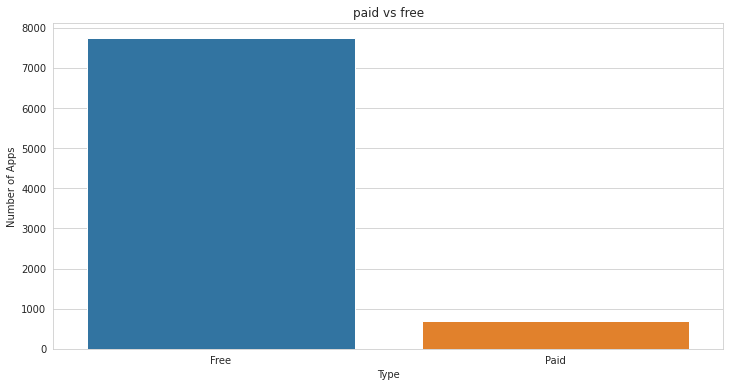

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(playstore['Type'])
plt.title('paid vs free')
plt.ylabel('Number of Apps')
plt.show()

INFERENCE:Almost apps are free

Number of installs type wise according to Category

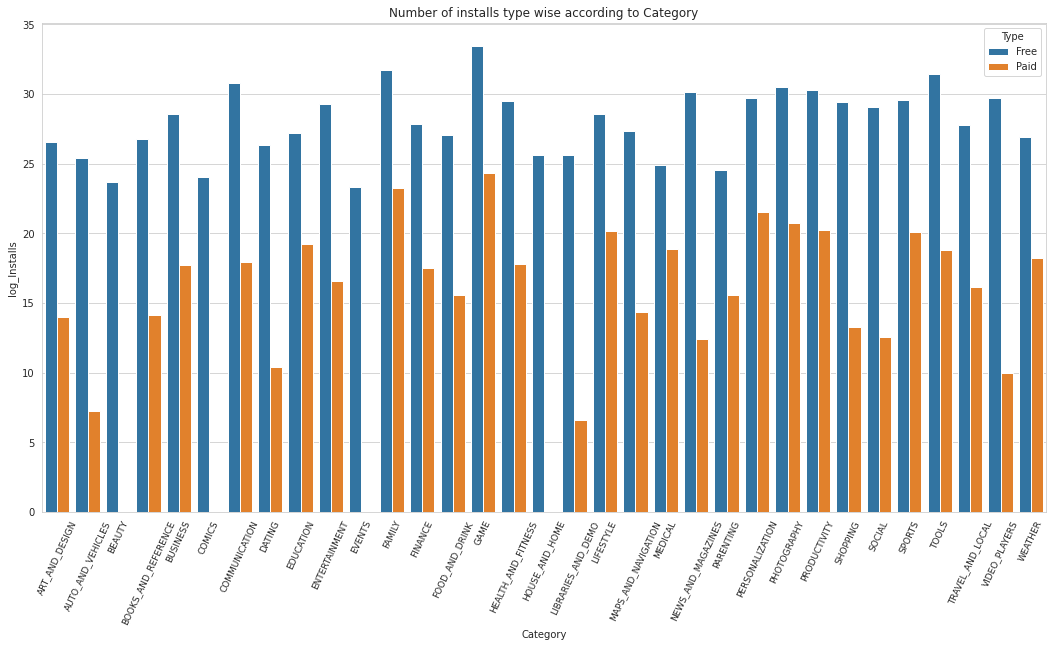

In [ ]:
#How many apps were installed according to its type?
playstore['Gaming Category App'] = playstore['Category']=='GAME'
categoty_type_installs = playstore.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

INFERENCE:from above it concluded that food_and_drink is free top app and game is on top paid app

type of review in dataset

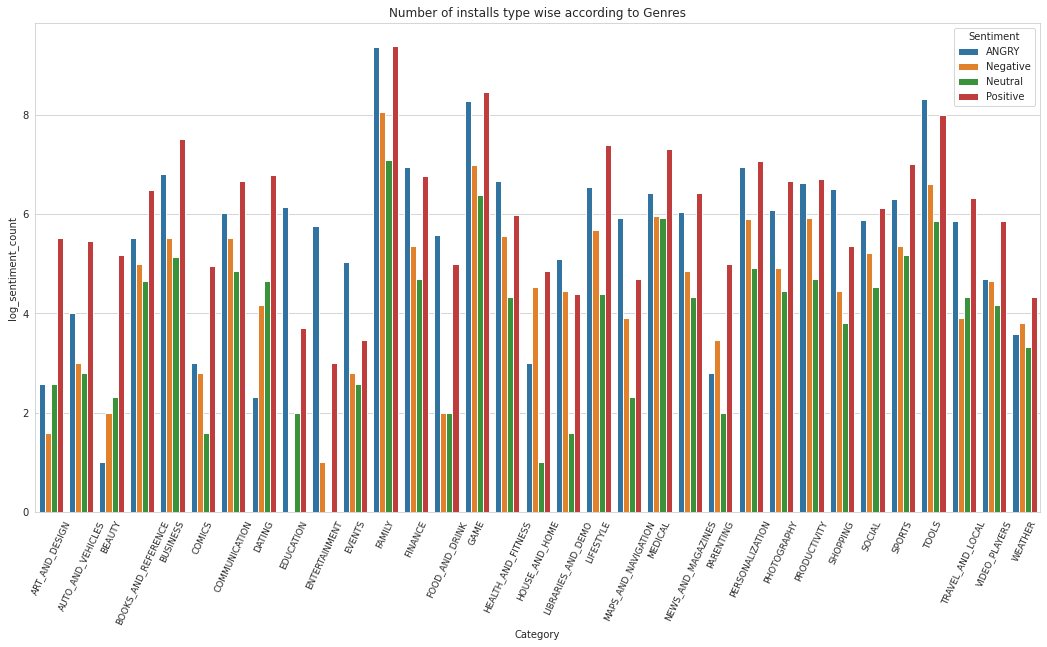

In [ ]:
#distribuion type of review in dataset
category_sentiment = playstore.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);


INFERENCE: it can be seen that the number of positive and angry reviews are way higher than negative and family app has the top angry and positive review.

sentiment_subjectivity proportional to sentiment_polarity



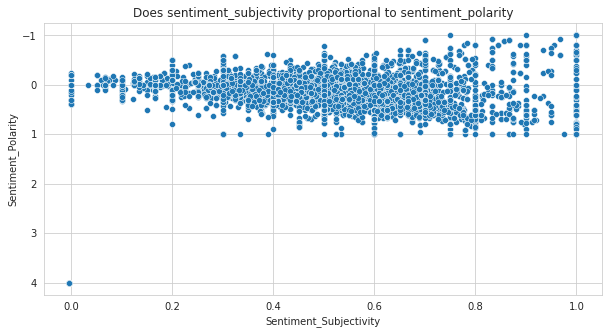

In [ ]:
#Does sentiment_subjectivity proportional to sentiment_polarity?
sentimet_subjectivity_polarity = playstore.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

plt.figure(figsize=(10,5))
sns.scatterplot(playstore['Sentiment_Subjectivity'], playstore['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()


INFERENCE: **from the above it is concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case shows a proportional behavior 

 category App’s have the most number of installs?Which

In [ ]:
highest_Installs_df = playstore.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)


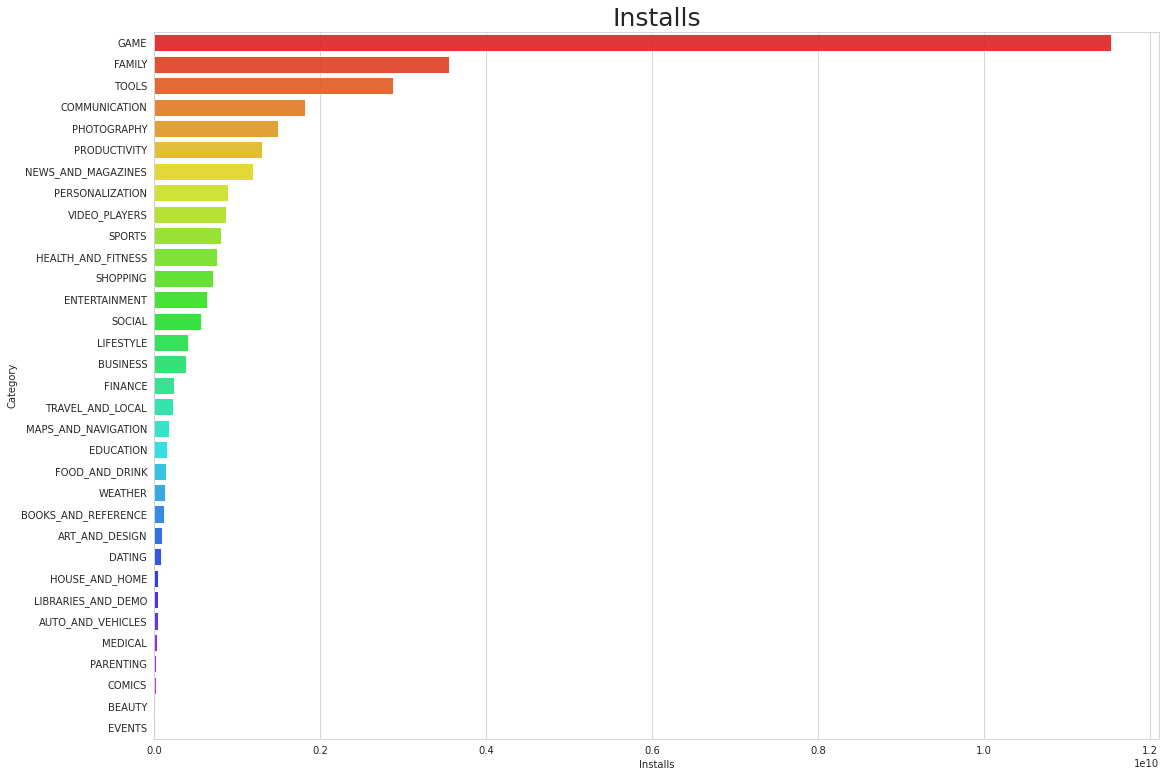

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "gist_rainbow")
graph.set_title("Installs", fontsize = 25);

from above visulisation it concluded tha the top categories with highest installed are game, family and tool

Which are the top 10 expensive Apps in the play store?

In [ ]:
top10PaidApps = playstore[playstore['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)


In [ ]:
top10PaidApps_df = top10PaidApps[['App1', 'Installs']]


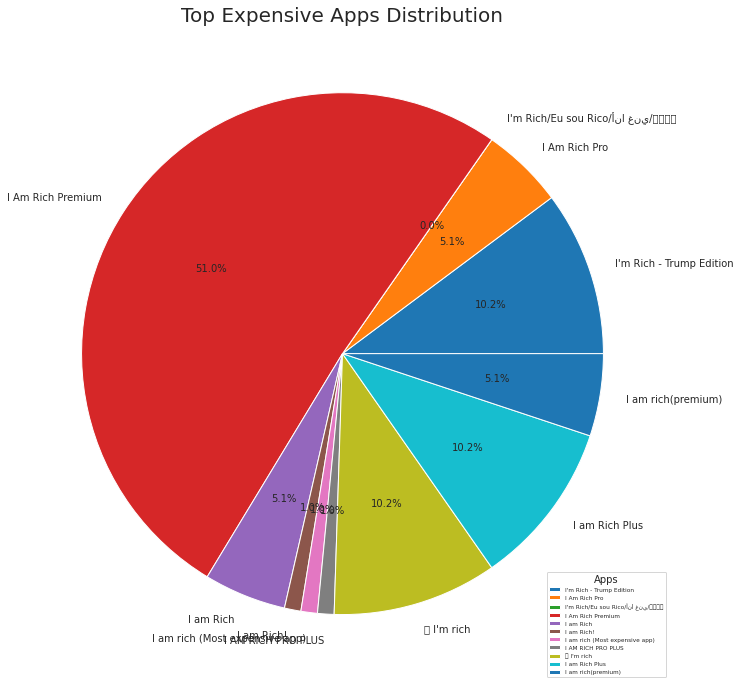

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App1, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App1, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

From the above graph, we can interpret that the App I am rich premium is the most expensive app in the google play store followed by I am Rich . we also had to drop one-row data for this visualization because the language of the app was Chinese and it was messing with the pie chart, visualization.

In [ ]:
top10PaidApps_df = top10PaidApps[['App2', 'Installs']]

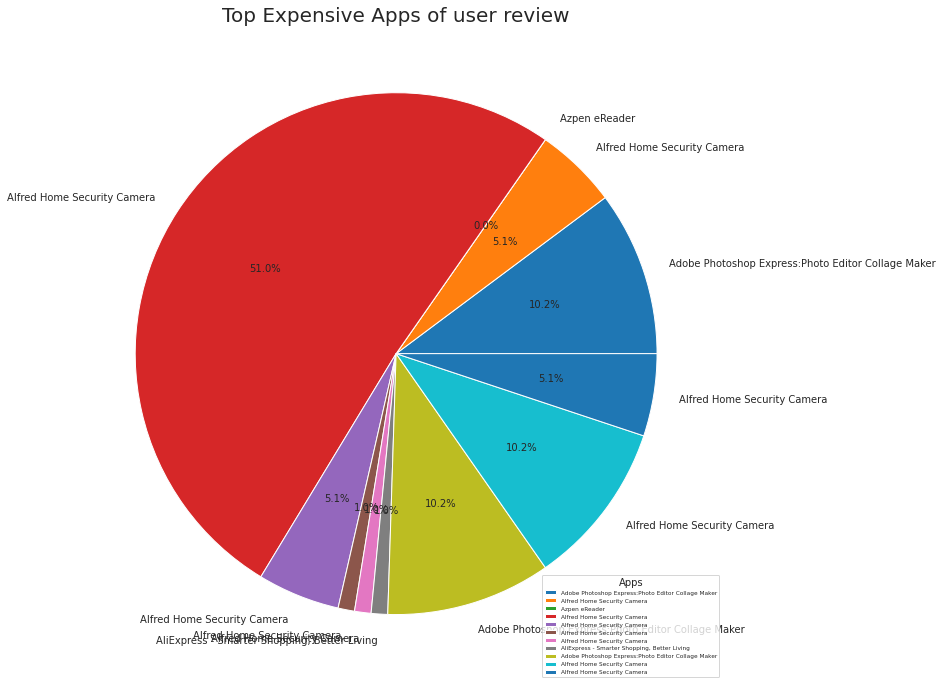

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App2, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps of user review',size = 20);
plt.legend(top10PaidApps_df.App2, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

in the user review alfer home security camera is the most expensive app in it

Which are the Apps with the highest number of reviews?

In [ ]:
Apps_with_Highest_rev = playstore.sort_values(by='Reviews', ascending=False).head(20)


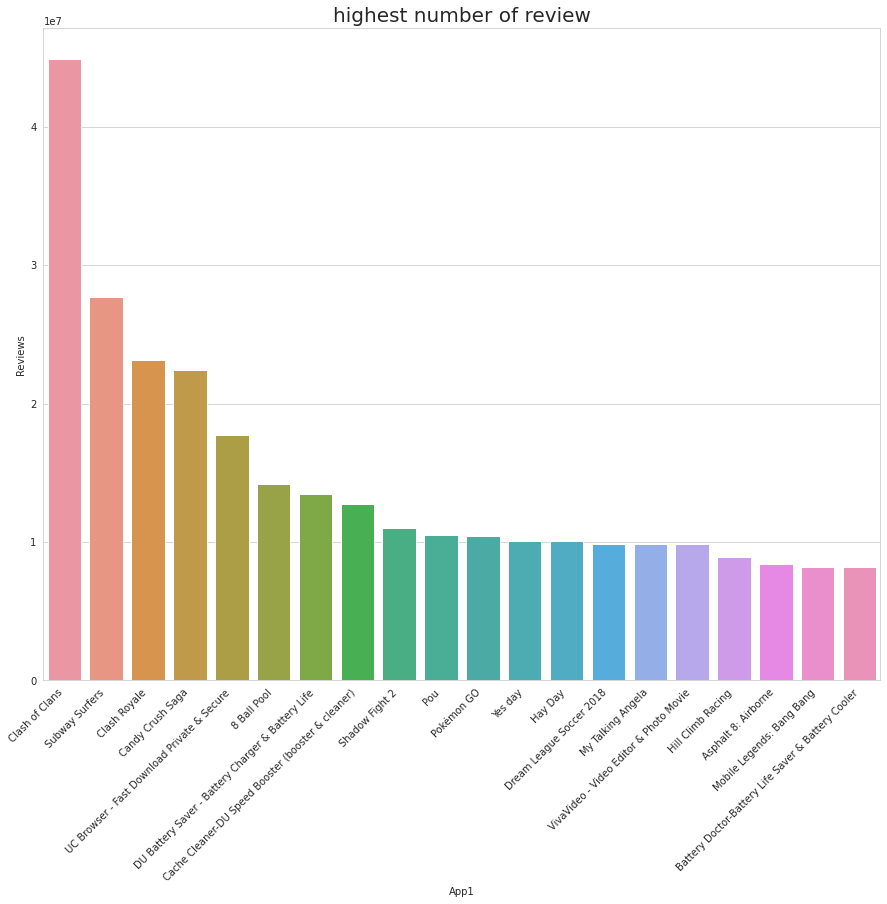

In [ ]:
plt.figure(figsize=(15,12))
plt.title('highest number of review',size = 20)    
graph = sns.barplot(x = Apps_with_Highest_rev.App1, y = Apps_with_Highest_rev.Reviews)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

above are the top gaming apps which has highest number of reviews

**SUMMARY**: play store app review analysis is the project which i choice  to done individually.
at first i dont know how to do and what eventually after analysing the data i gain some confidence .there are two csv files first is play store analysis and second is the user reviews.
after cleaning NaN valuesand duplicates i merged the file using function concatenate then i visualized the data frame. i found at that most installs category is game ,education and tools.
and user alwayes reffer to use the free app type.

**CONCLUSION:**
1-92.9% apps are Free and 8.1% apps 
are paid in type.
2-82.01% apps have Everyone content 
rating.
3-Events category has a highest mean 
rating of 4.39 and Dating category has 
lowest 4.05
rating.
4-Family, Game and Tools are top three 
categories having 1750, 926 and 699
app count.
5-Most competitive category: Family.
Category with the highest number of 
installs: Game.
6-Tools, Entertainment, Education, 
Business and Medical are top 20
Genres.
7-2000 Apps has rating more than 4.0 
including both type of app.
8-Overall sentiment percentage of merged 
dataset in which Positive sentiment 
count is 26.9%, Negative 16.2% and
angry 26.2% Neutral 30.6 %.
9-It's good to develop a Free type app and 
having a content rating for Everyone.
Percentage of apps that are top rated = 
81.80%.
10-top expensive apps for play store
analysis are I am reach premium and for 
user review is Alfred home security 
camera. 
11-Highest number of reviews of gaming 
app in play store is clash of clans and 
subway surfer and clash royale
Maximum number of apps present in
google play store comes under game, 
family, tool.
12-Family has the highest positive and 
angry review as compared to negative 
and neutral reviews.
13-Food and Drink has the highest free 
category
14-And game is the highest paid category 
in it.
15-1550 has the free type of family 
category count and only 20 is paid count 
in it.
16-Top 20 genres rating are board: pretend
play, comics: creativity, health and 
fitness; education, entertainment;
creativity, adventure; brain games, 
strategy; adventure& a venture, puzzle; 
education, simulation; pretend play etc.
17-August 3,2018 179 apps are update.
I am rich is the top earning app in play 
store analysis.
18-Alfred home security camera is the top 
earning app of the user reviews.
19-Tool, entertainment, education is the top 
20 genera having 750, 510,460 app.
20-Highest content Rating is for everyone 
i.e.,82.01%.
21-Game is the highest review i.e.,600000.
Highest rating is 4.3 which frequency is 
1.6 on the play store